# Predicting the Sale Price of Bulldozers using Machine Learning

The goal of this work is predicting the sale price of bulldozers.

## 1. Problem definition

How well can we predict the future sale price of a bulldozer giving its characteristics and
previous examples of how much similar bulldozers have been sold for? 

## 2. Data
The data is downloaded from the Kaggle Bluebook for Bulldozers competition:
                      https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are three main datasets:

- Train.csv is the training set, which contains data through the end of 2011.
- Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. 
- Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. 
             

## 3. Evaluation

The evaluation metric that we're going to use is the **RMSLE (root mean squared error)** between the actual and predicted auction prices.

## 4. Features

Kaggle provides a data disctionarty detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?gid=1021421956#gid=1021421956

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 

In [166]:
# Load training and validation datasets
df_train = pd.read_csv("data/Train/Train.csv", low_memory=False)
df_valid = pd.read_csv("data/Valid/Valid.csv", low_memory=False)

# Add a column to distinguish between train and validation data (optional but helpful)
#df_train['set'] = 'train'
#df_valid['set'] = 'valid'

# Concatenate both DataFrames
df = pd.concat([df_train, df_valid], ignore_index=True)


In [167]:
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,NaN,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Texas,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,NaN,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,30NX2,30,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,NaN,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Rubber,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,NaN,1794518,21435,149,2.0,2006,NaN,Na

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 401125 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [169]:
df.isna().sum()

SalesID                          0
SalePrice                    11573
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

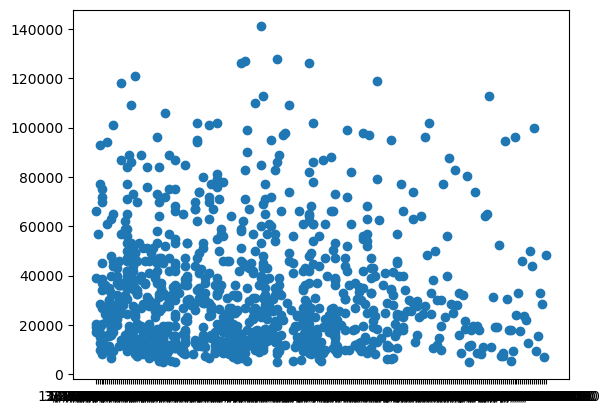

In [170]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [171]:
df.saledate

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

<Axes: ylabel='Frequency'>

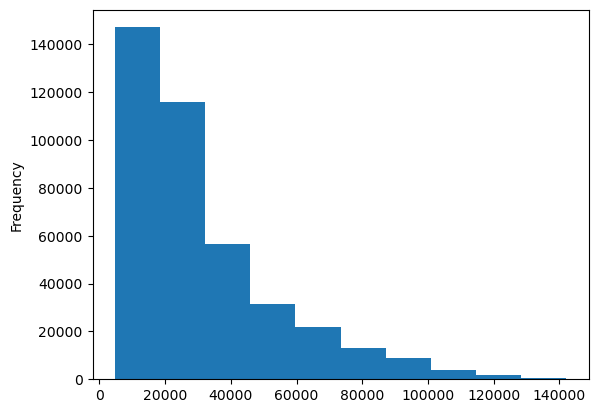

In [172]:
df.SalePrice.plot.hist()

### Parsing dates

When we work with time series data, we want to enrich the time and date component as much as possible. 

We can do that by telling pandas which of our columns has dates in it, using the 'parse_dates' parameter.

In [173]:
# Load training and validation datasets
df_train = pd.read_csv("data/Train/Train.csv",
                       low_memory=False,
                       parse_dates=["saledate"])
df_valid = pd.read_csv("data/Valid/Valid.csv",
                       low_memory=False,
                      parse_dates=["saledate"])

# Concatenate both DataFrames
df = pd.concat([df_train, df_valid], ignore_index=True)

In [174]:
df.saledate.dtype

dtype('<M8[ns]')

In [175]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

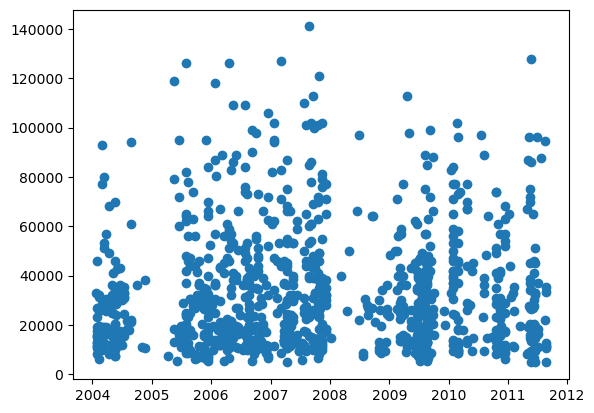

In [176]:
fig, ax= plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [177]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [179]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate

When working with time series data, it's a good idea to sort it by date.

In [180]:
# Sort DataFrame in date order
df= df.sort_values(by=["saledate"], ascending=True)
df.saledate.head(20) 

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

We make a copy of the original DataFrame so when we manipulate the copy we still got our original data.

In [181]:
# Make a copy
df_tmp = df.copy()

In [182]:
df_tmp.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

## Add datetime parameters for saledate column

In [183]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayofWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear


In [184]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [185]:
# Now we've enriched our DataFrame with date time features, we can remove saledate
df_tmp= df_tmp.drop("saledate", axis=1)

In [186]:
# Check the values of different columns
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virgi

# 5. Modeling 

A very quick EDA has been done, let's start doing some model-driven EDA.

In [187]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 401125 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

### Convert string to categories

One way we can turn all of our data into numbers is by converting them into pandas categories.

In [188]:
# Find the columns which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [189]:
# This will turn all of the object columns into category values
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = df_tmp[label].astype("category")
    

Now let's check if it worked by calling .info() on our DataFrame.

In [190]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 401125 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [191]:
# Get the category names of a given column
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [192]:
# Inspect the category codes
df_tmp.state.cat.codes #gives a numeric representation of our object/string datatype columns.

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

**All of our data is categorical and thus we can now turn the categories into numbers, however it's still missing values!**

### Saving our preprocessed data:

In [193]:
# Save preprocessed data to file
df_tmp.to_csv("Data/TrainAndValid_object_values_as_categories.csv",
              index=False)

In [194]:
# Import preprocessed data to file
df_tmp = pd.read_csv("Data/TrainAndValid_object_values_as_categories.csv",
                     low_memory=False)

df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayOfYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,TD20,NaN,NaN,NaN,Medium,"Track Type Tractor, Dozer - 105.0 to 130.0 Hor...",Texas,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Direct Drive,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,A66,NaN,NaN,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,Wheel Loader,NaN,OROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,D7,G,NaN,NaN,Large,"Track Type Tractor, Dozer - 190.0 to 260.0 Hor...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,A62,NaN,NaN,NaN,NaN,Wheel Loader - Unidentified,Florida,WL,Wheel Loader,NaN,EROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,D3,B,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


Excellent, looking at the tale end (the far right side) our processed DataFrame has the columns we added to it (the extra data features) but it's still missing values.

But if we check `df_tmp.info()`

In [195]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 401125 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

when we read in a CSV, pandas defaults to interpreting strings as object datatypes. however, we can easily convert them to the category datatype as we did before.

**Note:** If you'd like to retain the datatypes when saving your data, you can use file formats such as parquet (Apache Parquet) and feather. These filetypes have several advantages over CSV in terms of processing speeds and storage size. However, data stored in these formats is not human-readable so you won't be able to open the files and inspect them without specific tools. For more on different file formats in pandas, see the IO tools documentation page.

In [196]:
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        # Turn object columns into category datatype
        df_tmp[label] = df_tmp[label].astype("category")

## Fill missing values 

### Fill numerical missing values first:

In [197]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofWeek
saleDayOfYear


In [198]:
df_tmp.ModelID

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [199]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

SalePrice
auctioneerID
MachineHoursCurrentMeter


In [200]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary comlumn which tells us if the data was missing
            df_tmp[label+"_is_missing"]= pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median()) 

In [201]:
#Check if there is any null numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [202]:
# Check to see how many examples were missing
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [203]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and turning categorical variables into numbers

In [204]:
# Check for columns which aren't numeric
missing = df_tmp.isna().sum()
missing = missing[missing > 0]  # Show only columns with missing values
print(missing)

UsageBand                  339028
fiSecondaryDesc            140727
fiModelSeries              354031
fiModelDescriptor          337882
ProductSize                216605
Drive_System               305611
Enclosure                     334
Forks                      214983
Pad_Type                   331602
Ride_Control               259970
Stick                      331602
Transmission               224691
Turbocharged               331602
Blade_Extension            386715
Blade_Width                386715
Enclosure_Type             386715
Engine_Horsepower          386715
Hydraulics                  82565
Pushblock                  386715
Ripper                     305753
Scarifier                  386704
Tip_Control                386715
Tire_Size                  315060
Coupler                    192019
Coupler_System             367724
Grouser_Tracks             367823
Hydraulics_Flow            367823
Track_Type                 310505
Undercarriage_Pad_Width    309782
Stick_Length  

In [205]:
# Turning categorical variables into numbers and filling missing values
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value 
        df_tmp[label+"_is_missing"]= pd.isnull(content)
        # Turn categories into numbers and add+1 for non missing values encoding
        df_tmp[label] = pd.Categorical(content).codes+1

In [206]:
pd.Categorical(df_tmp["state"]).codes+1

array([44,  9,  9, ...,  5,  5,  5], shape=(412698,), dtype=int8)

In [207]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 104 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(47), float64(3), int16(4), int64(10), int8(40)
memory usage: 78.3 MB


In [208]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [209]:
# Check for columns which aren't numeric
missing = df_tmp.isna().sum()
missing = missing[missing > 0]  # Show only columns with missing values
print(missing)

Series([], dtype: int64)


Now that all of data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model.

In [210]:
import time

In [211]:
#Let's build a machine learning model
start = time.time()

from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
model= RandomForestRegressor(n_jobs=-1,
                            random_state=42)  # To use as many cores of CPU possible cuz we have 412698 rows

# Fit the model
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])


end = time.time()
print(f"Execution time: {end - start:.4f} seconds")

Execution time: 166.2756 seconds


### Splitting data into train/validation test

In [212]:
df_tmp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [213]:
df_tmp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [214]:
# Split data into training and validation
df_val = df_tmp[df_tmp.saleYear==2012]
df_train= df_tmp[df_tmp.saleYear!=2012]

len(df_val), len(df_train)

(11573, 401125)

In [215]:
# Spli data into X and y
X_train, y_train= df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid= df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 103), (401125,), (11573, 103), (11573,))

In [216]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

### Building an evaluation function

In [217]:
# Create evaluation function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and 
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    
    # Make predictions on train and validation features
    train_preds = model.predict(X_train)
    
    val_preds = model.predict(X_valid)

    # Create a scores dictionary of different evaluation metrics
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores


## Testing our model on a subset (to tune the hyperparameters)

In [218]:
# This takes far too long for experimenting

#start = time.time()

#model= RandomForestRegressor(n_jobs=-1,
#                             random_state=42)
#model.fit(X_train, y_train)

#end = time.time()
#print(f"Execution time: {end - start:.4f} seconds")

In [219]:
len(X_train)

401125

In [220]:
start = time.time()

# Change max samples in RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, # this is the default
                              n_jobs=-1,
                              max_samples=10000) # each estimator sees max_samples (the default is to see all available samples)

# Cutting down the max number of samples each tree can see improves training time
model.fit(X_train, 
          y_train)

end = time.time()
print(f"Execution time: {end - start:.4f} seconds")

Execution time: 5.0056 seconds


In [221]:
show_scores(model)

{'Training MAE': 5567.703138124028,
 'Valid MAE': 17298.29758921628,
 'Training RMSLE': np.float64(0.2577046596114659),
 'Valid RMSLE': np.float64(0.6584730272133252),
 'Training R^2': 0.8601691048666948,
 'Valid R^2': 0.0}

### Hyperparameter tuning with Randomized

In [222]:
start = time.time()

from sklearn.model_selection import RandomizedSearchCV

# 1. Define a dictionary with different values for RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5,10],
           "min_samples_split": np.arange(2, 20, 2), # min_samples_split must be an int in the range [2, inf) or a float in the range (0.0, 1.0]
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"], # Note: "max_features='auto'" is equivalent to "max_features=1.0", as of Scikit-Learn version 1.1
           "max_samples": [10000]}

# 2. Setup instance of RandomizedSearchCV to explore different parameters 
rs_model = RandomizedSearchCV(estimator=RandomForestRegressor(n_jobs=-1,
                                                             random_state=42),# can pass new model instance directly, all settings will be taken from the rf_grid
                              param_distributions=rf_grid,
                              n_iter=2,#   scoring="neg_root_mean_squared_log_error", # want to optimize for RMSLE, though sometimes optimizing for the default metric (R^2) can lead to just as good results all round
                              cv=5,
                              verbose=True) # control how much output gets produced, higher number = more output

# 3. Fit the model using a series of different hyperparameter values
rs_model.fit(X=X_train, 
             y=y_train)

end = time.time()
print(f"Execution time: {end - start:.4f} seconds")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Execution time: 13.8560 seconds


In [223]:
# Find the best hyperparameters from RandomizedSearchCV
rs_model.best_params_

{'n_estimators': np.int64(90),
 'min_samples_split': np.int64(10),
 'min_samples_leaf': np.int64(1),
 'max_samples': 10000,
 'max_features': 1,
 'max_depth': None}

In [224]:
# Evaluate the randomized search model
show_scores(rs_model)

{'Training MAE': 8737.665284228082,
 'Valid MAE': 15115.792343956151,
 'Training RMSLE': np.float64(0.38631768054868737),
 'Valid RMSLE': np.float64(0.579655772695386),
 'Training R^2': 0.6926607479259148,
 'Valid R^2': 0.0}

### Train a model with the best hyperparameters

**Note:** These ere found after 100 iterations of RandomizedSearchCV

In [225]:
start = time.time()

# Create a model with best found hyperparameters 
# Note: There may be better values out there with longer searches but these are 
# the best I found with a ~2 hour search. 
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)

# Fit a model to the preprocessed data
ideal_model.fit(X=X_train, 
                y=y_train)

end = time.time()
print(f"Execution time: {end - start:.4f} seconds")

Execution time: 32.1960 seconds


In [226]:
# Evaluate ideal model
ideal_model_scores = show_scores(model=ideal_model)
ideal_model_scores

{'Training MAE': 2966.99062411528,
 'Valid MAE': 18230.00821385085,
 'Training RMSLE': np.float64(0.14504044885805176),
 'Valid RMSLE': np.float64(0.6896458970725543),
 'Training R^2': 0.9584519242665508,
 'Valid R^2': 0.0}

### Making predictions on test data

In [237]:
# Import the test data

df_test= pd.read_csv("Data/Test.csv",
                    low_memory=False,
                    parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,580,G,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Wyoming,BL,Backhoe Loaders,Two Wheel Drive,OROPS,Yes,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,936,NaN,NaN,NaN,Medium,Wheel Loader - 135.0 to 150.0 Horsepower,Virginia,WL,Wheel Loader,NaN,EROPS,Yes,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,EC210,B,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,330,C,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,650,K,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Hydrostatic,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [238]:
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688.0,28555.0,6038.0,8940.0,2286.0
UsageBand,Low,High,Medium,High,Low
saledate,2012-05-03 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00
fiModelDesc,580G,936,EC210BLC,330CL,650K


### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [239]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayofWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear

    df= df.drop("saledate", axis=1)


    # Fill numeric rows with the median
    for label, content in df_tmp.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary comlumn which tells us if the data was missing
                df_tmp[label+"_is_missing"]= pd.isnull(content)
                # Fill missing numeric values with median
                df_tmp[label] = content.fillna(content.median()) 
                
            # Fill categorical missing data and turn categories into numbers
            if not pd.api.types.is_numeric_dtype(content):
                df[label+"_is_missing"]= pd.isnull(content)
                # Add +1 to the category code because pandas encodes missing categories as -1
                df[label] = pd.Categorical(content).codes + 1

    return df

In [240]:
# Process test data
df_test = preprocess_data(df_test)
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayOfYear
0,1227829,1006309,3168,121,3,1999,3688.0,Low,580G,580,G,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Wyoming,BL,Backhoe Loaders,Two Wheel Drive,OROPS,Yes,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,5,3,3,124
1,1227844,1022817,7271,121,3,1000,28555.0,High,936,936,NaN,NaN,NaN,Medium,Wheel Loader - 135.0 to 150.0 Horsepower,Virginia,WL,Wheel Loader,NaN,EROPS,Yes,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2012,5,10,3,131
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,EC210BLC,EC210,B,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2012,5,10,3,131
3,1227848,56204,1269,121,3,2006,8940.0,High,330CL,330,C,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN,2012,5,10,3,131
4,1227863,1053887,22312,121,3,2005,2286.0,Low,650K,650,K,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Hydrostatic,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,5,10,3,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,80NX3,80,NX,3,NaN,Small,"Hydraulic Excavator, Track - 8.0 to 11.0 Metri...",Florida,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Rubber,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2012,10,24,2,298
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,28N,28,N,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2012,10,24,2,298
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,35N,35,N,NaN,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2012,10,24,2,298
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,35N,35,N,Na

In [241]:
# Finding how columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'Backhoe_Mounting_is_missing',
 'Blade_Extension_is_missing',
 'Blade_Type_is_missing',
 'Blade_Width_is_missing',
 'Coupler_System_is_missing',
 'Coupler_is_missing',
 'Differential_Type_is_missing',
 'Drive_System_is_missing',
 'Enclosure_Type_is_missing',
 'Enclosure_is_missing',
 'Engine_Horsepower_is_missing',
 'Forks_is_missing',
 'Grouser_Tracks_is_missing',
 'Grouser_Type_is_missing',
 'Hydraulics_Flow_is_missing',
 'Hydraulics_is_missing',
 'MachineHoursCurrentMeter_is_missing',
 'Pad_Type_is_missing',
 'Pattern_Changer_is_missing',
 'ProductGroupDesc_is_missing',
 'ProductGroup_is_missing',
 'ProductSize_is_missing',
 'Pushblock_is_missing',
 'Ride_Control_is_missing',
 'Ripper_is_missing',
 'SalePrice_is_missing',
 'Scarifier_is_missing',
 'Steering_Controls_is_missing',
 'Stick_Length_is_missing',
 'Stick_is_missing',
 'Thumb_is_missing',
 'Tip_Control_is_missing',
 'Tire_Size_is_missing',
 'Track_Type_is_missing',
 'Transmission_is_missing',
 'Travel_Controls_is_missing',

In [242]:
# Manually adjust df_test to have auctioneerID_is_missing column

# Set of missing indicator columns
missing_cols = {
    'Backhoe_Mounting_is_missing', 
    'Blade_Extension_is_missing',
    'Blade_Type_is_missing',
    'Blade_Width_is_missing',
    'Coupler_System_is_missing',
    'Coupler_is_missing',
    'Differential_Type_is_missing',
    'Drive_System_is_missing',
    'Enclosure_Type_is_missing',
    'Enclosure_is_missing',
    'Engine_Horsepower_is_missing',
    'Forks_is_missing',
    'Grouser_Tracks_is_missing',
    'Grouser_Type_is_missing',
    'Hydraulics_Flow_is_missing',
    'Hydraulics_is_missing',
    'MachineHoursCurrentMeter_is_missing',
    'Pad_Type_is_missing',
    'Pattern_Changer_is_missing',
    'ProductGroupDesc_is_missing',
    'ProductGroup_is_missing',
    'ProductSize_is_missing',
    'Pushblock_is_missing',
    'Ride_Control_is_missing',
    'Ripper_is_missing',
    'SalePrice_is_missing',
    'Scarifier_is_missing',
    'Steering_Controls_is_missing',
    'Stick_Length_is_missing',
    'Stick_is_missing',
    'Thumb_is_missing',
    'Tip_Control_is_missing',
    'Tire_Size_is_missing',
    'Track_Type_is_missing',
    'Transmission_is_missing',
    'Travel_Controls_is_missing',
    'Turbocharged_is_missing',
    'Undercarriage_Pad_Width_is_missing',
    'UsageBand_is_missing',
    'auctioneerID_is_missing',
    'fiBaseModel_is_missing',
    'fiModelDesc_is_missing',
    'fiModelDescriptor_is_missing',
    'fiModelSeries_is_missing',
    'fiProductClassDesc_is_missing',
    'fiSecondaryDesc_is_missing',
    'state_is_missing'
}

# Assign False to each column in df_test
for col in missing_cols:
    df_test[col] = False

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayOfYear,Hydraulics_is_missing,Grouser_Tracks_is_missing,Drive_System_is_missing,Differential_Type_is_missing,Coupler_System_is_missing,Blade_Width_is_missing,Tip_Control_is_missing,Tire_Size_is_missing,fiBaseModel_is_missing,ProductGroupDesc_is_missing,UsageBand_is_missing,Travel_Controls_is_missing,Ripper_is_missing,MachineHoursCurrentMeter_is_missing,Scarifier_is_missing,Track_Type_is_missing,Pushblock_is_missing,Forks_is_missing,Pad_Type_is_missing,Transmission_is_missing,fiModelDesc_is_missing,Enclosure_is_missing,Pattern_Changer_is_missing,Coupler_is_missing,Hydraulics_Flow_is_missing,SalePrice_is_missing,Thumb_is_missing,ProductGroup_is_missing,Turbocharged_is_missing,Enclosure_Type_is_missing,fiSecondaryDesc_is_missing,Grouser_Type_is_missing,fiModelSeries_is_missing,Engine_Horsepower_is_missing,fiProductClassDesc_is_missing,fiModelDescriptor_is_missing,Stick_is_missing,Ride_Control_is_missing,Backhoe_Mounting_is_missing,auctioneerID_is_missing,state_is_missing,ProductSize_is_missing,Undercarriage_Pad_Width_is_missing,Blade_Type_is_missing,Blade_Extension_is_missing,Steering_Controls_is_missing,Stick_Length_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,Low,580G,580,G,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Wyoming,BL,Backhoe Loaders,Two Wheel Drive,OROPS,Yes,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,5,3,3,124,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1227844,1022817,7271,121,3,1000,28555.0,High,936,936,NaN,NaN,NaN,Medium,Wheel Loader - 135.0 to 150.0 Horsepower,Virginia,WL,Wheel Loader,NaN,EROPS,Yes,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2012,5,10,3,131,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,EC210BLC,EC210,B,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2012,5,10,3,131,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1227848,56204,1269,121,3,2006,8940.0,High,330CL,330,C,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Na

Now, our test dataframe has the same features as our training dataframe, we can make predictions!

In [245]:
# Make sure df_test has same columns and in the same order
df_test = df_test[X_train.columns]

In [247]:
missing_cols = set(X_train.columns) - set(df_test.columns)
extra_cols = set(df_test.columns) - set(X_train.columns)

print("Missing in test set:", missing_cols)
print("Unexpected in test set:", extra_cols)


Missing in test set: set()
Unexpected in test set: set()


In [256]:
# Process test data
for label, content in df_test.items():
    # Handle numeric columns
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a missing indicator
            df_test[label + "_is_missing"] = pd.isnull(content)
            # Fill missing values with the median
            df_test[label] = content.fillna(content.median())
    
    # Handle categorical columns
    else:
        df_test[label + "_is_missing"] = pd.isnull(content)
        # Convert categories to numbers with +1 to avoid -1 for NaN
        df_test[label] = pd.Categorical(content).codes + 1


In [257]:
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayOfYear,SalePrice_is_missing,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing,UsageBand_is_missing,fiModelDesc_is_missing,fiBaseModel_is_missing,fiSecondaryDesc_is_missing,fiModelSeries_is_missing,fiModelDescriptor_is_missing,ProductSize_is_missing,fiProductClassDesc_is_missing,state_is_missing,ProductGroup_is_missing,ProductGroupDesc_is_missing,Drive_System_is_missing,Enclosure_is_missing,Forks_is_missing,Pad_Type_is_missing,Ride_Control_is_missing,Stick_is_missing,Transmission_is_missing,Turbocharged_is_missing,Blade_Extension_is_missing,Blade_Width_is_missing,Enclosure_Type_is_missing,Engine_Horsepower_is_missing,Hydraulics_is_missing,Pushblock_is_missing,Ripper_is_missing,Scarifier_is_missing,Tip_Control_is_missing,Tire_Size_is_missing,Coupler_is_missing,Coupler_System_is_missing,Grouser_Tracks_is_missing,Hydraulics_Flow_is_missing,Track_Type_is_missing,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,25,0,0,0,2,51,1,1,4,3,2,2,1,2,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,5,3,3,124,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,0,0,0,4,57,46,6,6,0,1,2,0,2,0,0,0,0,0,0,0,1,0,0,0,0,7,3,0,0,0,0,0,0,0,0,0,0,0,0,3,2,2012,5,10,3,131,False,False,False,False,False,False,True,True,True,False,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,9,0,33,3,14,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,2,17,17,2,1,1,0,0,0,0,0,2012,5,10,3,131,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,13,0,32,3,18,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,0,0,0,2,17,20,2,2,2,0,0,0,0,0,2012,5,10,3,131,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,33,0,0,0,48,8,5,5,0,3,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,5,0,0,2012,5,10,3,131,False,False,False,False,False,False,False,True,True,True,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [258]:
# Make predictions on the test dataset
test_preds= ideal_model.predict(df_test)

In [259]:
len(test_preds)

12457

In [260]:
test_preds

array([17891.91828639, 18391.18418534, 47994.74797505, ...,
       12285.35938498, 16377.16133891, 27183.99245876], shape=(12457,))

these predictions are not in the same format kaggle is asking for:

In [262]:
# Format predictions in the same format Kaggle is after

df_preds= pd.DataFrame()
df_preds["SalesID"]= df_test["SalesID"]
df_preds["SalesPrice"]= test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17891.918286
1,1227844,18391.184185
2,1227847,47994.747975
3,1227848,63537.389402
4,1227863,55978.008224
...,...,...
12452,6643171,40354.344045
12453,6643173,12681.803212
12454,6643184,12285.359385
12455,6643186,16377.161339


In [263]:
# Export predictions data
df_preds.to_csv("data/test_predictions", index=False)

### Feature importance

Here, we seek to figure out which different attributes of the data were most important when it comes to predicting the **target variable** (SalePrice).

In [265]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.37736271e-02, 2.10188660e-02, 4.08916096e-02, 2.15006662e-03,
       3.29656223e-03, 2.02595013e-01, 3.09942469e-03, 1.03787437e-03,
       3.79190040e-02, 6.55006912e-02, 6.04989204e-02, 4.49797054e-03,
       1.87347552e-02, 1.58313197e-01, 4.62754809e-02, 5.97997304e-03,
       1.32332730e-03, 4.68648248e-03, 3.17573792e-03, 5.88840748e-02,
       5.29006134e-04, 4.58164722e-05, 6.93180949e-04, 1.96733020e-04,
       1.17097972e-03, 2.59683305e-05, 5.43550399e-04, 2.69897506e-03,
       8.48548427e-04, 2.16526400e-04, 3.54406771e-03, 2.12920342e-03,
       5.13930207e-03, 1.74467208e-03, 2.29717284e-03, 1.04751384e-02,
       8.13932353e-04, 1.45369637e-02, 5.32160781e-04, 2.37332988e-03,
       1.67057309e-03, 7.35315991e-04, 2.39159974e-03, 5.94475590e-04,
       6.36537535e-04, 3.69161344e-04, 4.58368000e-04, 2.93317437e-03,
       8.64088782e-04, 3.68228578e-04, 1.87576309e-04, 7.21441562e-02,
       3.81205579e-03, 5.71660082e-03, 2.90935872e-03, 9.80759685e-03,
      

In [269]:
# Helper function for plotting feature importnace 
def plot_features(columns, importances, n=20):
    
    df= pd.DataFrame({"features": columns, 
                     "feature_importances": importances}).sort_values("feature_importances", ascending=False).reset_index(drop=True)

    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")

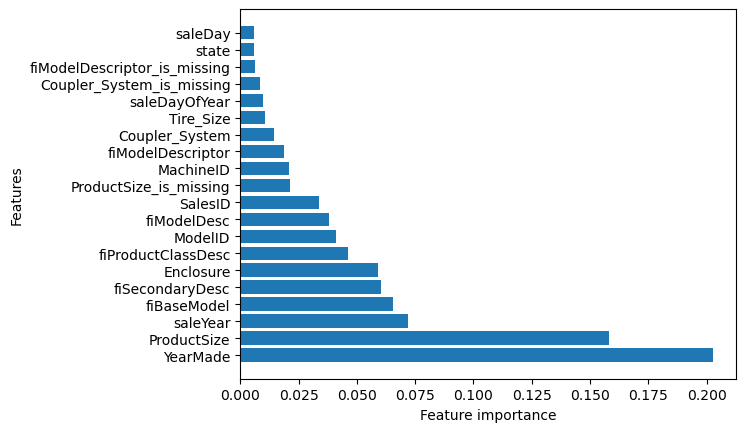

In [271]:
plot_features(df_test.columns,ideal_model.feature_importances_ )

### Top Contributing Features

The top four features contributing to our model’s predictive performance are: `YearMade`, `ProductSize`, `saleYear`, and `fiBaseModel`.

Referring to the original [data dictionary](https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing), these features are both economically and logically relevant to the target variable — the bulldozer’s sale price:

- `YearMade` – Indicates the year the machine was manufactured. Newer machines tend to be priced higher due to reduced wear and incorporation of more recent technologies.
- `ProductSize` – Represents the equipment's size category. Larger or more specialized machinery typically commands higher prices, reflecting their increased utility or capabilities.
- `saleYear` – The year in which the sale occurred. This engineered feature helps capture temporal trends such as inflation, depreciation, and market demand shifts.
- `fiBaseModel` – Denotes the general model series of the machine. It captures differences in brand, performance, and technological specifications, all of which impact pricing.

From a domain knowledge perspective, these features align well with the factors one would intuitively consider when valuing heavy equipment. For example, when purchasing vehicles or machinery, both the year of manufacture and model type are critical in determining price. Similarly, the size of the equipment and the market context (year of sale) play a substantial role.

